In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import matplotlib.pyplot as plt

## 数据检查

In [2]:
index = pd.read_csv('./data/sz50_flag.csv',index_col = 0)
index.DATETIME = pd.to_datetime(index.DATETIME)
index.set_index('DATETIME',inplace = True)
index.flag = index.flag.fillna(0)

In [3]:
index.head()

,open,high,low,close,volume,amt,pct_chg,turn,MACD_MACD,MACD_DIFF,...,stage_low,up_days,down_days,breakout_ma,breakdown_ma,history_high_days,history_low_days,bull_bear_ma,bull_bear_ma.1,flag
DATETIME,,,,,,,,,,,,,,,,,,,,,
2005-01-04,836.988,836.988,824.008,827.071,403169700.0,2.136409e+09,-1.8579,1.0071,-3.3264,-10.8275,...,True,0,4,False,False,0,1,False,True,0.0
2005-01-05,825.707,836.428,822.966,831.428,302086300.0,1.705649e+09,0.5268,0.7546,-3.4300,-11.3081,...,True,1,0,False,False,0,2,False,True,0.0
2005-01-06,831.989,833.070,820.335,822.499,275357400.0,1.519687e+09,-1.0739,0.6878,-4.2799,-12.2681,...,True,0,1,False,False,0,3,False,True,-1.0
2005-01-07,822.669,832.950,819.440,823.616,306608600.0,1.640665e+09,0.1358,0.7659,-4.2610,-12.7912,...,True,1,0,False,False,0,3,False,True,0.0
2005-01-10,823.766,833.650,820.996,832.986,247941100.0,1.402314e+09,1.1377,0.6193,-2.6355,-12.3079,...,True,2,0,False,False,0,2,False,True,0.0


In [4]:
for i in range(1,len(index.columns)//10 + 2):
    index.iloc[:,10*(i-1):10*i].info()
'''TRUE和FAlSE会被识别成bool'''
'''类型：float、int、bool'''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4141 entries, 2005-01-04 to 2022-01-14
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       4141 non-null   float64
 1   high       4141 non-null   float64
 2   low        4141 non-null   float64
 3   close      4141 non-null   float64
 4   volume     4141 non-null   float64
 5   amt        4141 non-null   float64
 6   pct_chg    4141 non-null   float64
 7   turn       4141 non-null   float64
 8   MACD_MACD  4141 non-null   float64
 9   MACD_DIFF  4141 non-null   float64
dtypes: float64(10)
memory usage: 355.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4141 entries, 2005-01-04 to 2022-01-14
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MACD_DEA  4141 non-null   float64
 1   KDJ_K     4141 non-null   float64
 2   KDJ_D     4141 non-null   float64
 3   KDJ_J     4141 non-null   f

'TRUE和FAlSE会被识别成bool'

'类型：float、int、bool'

In [5]:
'''处理空值'''
'''处理前'''
tmp_isnull = index.isnull().sum()
tmp_isnull[tmp_isnull > 0]
index.div_compindex = index.div_compindex.fillna(0)
tmp_isnull = index.isnull().sum()
tmp_isnull = tmp_isnull[tmp_isnull > 0]
for col in tmp_isnull.index:
    if col != 'flag':
        index.drop(col,axis = 1,inplace = True)
        
'''处理后'''

tmp_isnull = index.isnull().sum()
tmp_isnull[tmp_isnull > 0]

'处理空值'

'处理前'

ENV.1                  4140
EXPMA                  4141
slowKD                 4141
dealnum                4141
open_auction_price     4141
open_auction_volume    4141
open_auction_amount    4141
div_compindex          2670
dtype: int64

'处理后'

Series([], dtype: int64)

In [6]:
index.describe()

,open,high,low,close,volume,amt,pct_chg,turn,MACD_MACD,MACD_DIFF,...,val_pe_avg,tech_uppct,tech_downpct,tech_limituppct,tech_limitdownpct,up_days,down_days,history_high_days,history_low_days,flag
count,4141.000000,4141.000000,4141.000000,4141.000000,4.141000e+03,4.141000e+03,4141.000000,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2240.350648,2263.112641,2218.356122,2242.172003,3.115557e+09,4.139068e+10,0.046011,0.677353,0.003268,4.037448,...,29.921342,46.746591,47.023395,2.856354,1.081894,1.063994,0.910891,0.079691,0.021009,-0.000241
std,791.275045,799.109813,781.591185,790.951805,3.032074e+09,4.339364e+10,1.686527,0.906741,27.388286,51.923734,...,10.891980,28.589235,28.713420,6.715208,5.549111,1.608705,1.256877,0.421552,0.204521,0.276713
min,699.266000,706.879000,693.528000,700.434000,1.632751e+08,8.378735e+08,-9.470800,0.057000,-157.658900,-199.680100,...,14.766000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1675.782000,1697.599000,1658.021000,1675.858000,1.642688e+09,1.699701e+10,-0.723200,0.172900,-11.088900,-18.357400,...,21.202100,22.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2217.045000,2239.457500,2192.491200,2219.611900,2.433337e+09,2.912485e+10,0.036700,0.265000,0.599100,3.372200,...,26.365400,44.000000,48.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2797.231000,2822.589100,2762.298300,2798.769500,3.469665e+09,4.924094e+10,0.837100,0.837100,13.769600,25.298700,...,36.546000,70.000000,70.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,4726.083000,4772.933000,4688.263000,4731.826000,3.774594e+10,4.282975e+11,9.672900,7.464900,147.884300,226.097200,...,74.475800,100.000000,100.000000,94.000000,80.000000,19.000000,9.000000,3.000000,3.000000,1.000000


In [7]:
print('拐点占比：{:.2%}'.format((len(index) - index.isnull().sum()['flag'])/len(index) ))
print('正拐点占比：{:.2%}'.format(len(index[index['flag'] == 1])/len(index)))
print('负拐点占比：{:.2%}'.format(len(index[index['flag'] == -1])/len(index)))

拐点占比：100.00%
正拐点占比：3.82%
负拐点占比：3.84%


### 连续/离散

In [8]:
unconti_col = []
c = 0
for i in range(len(index.columns[:-1])):
    if len(index.iloc[:,i].value_counts()) < 50:
        print('离散特征：{0}'.format(index.columns[i]))
        unconti_col.append(index.columns[i])
        c = 1
if c == 0:
    print('无离散特征')
len(index.columns) - 1
'''离散变量'''
len(unconti_col)
unconti_col
'''连续变量'''
conti_col = [col for col in index.columns[:-1] if col not in unconti_col]
len(conti_col)
conti_col

离散特征：tech_limitupnum
离散特征：tech_limitdownnum
离散特征：tech_limituppct
离散特征：tech_limitdownpct
离散特征：history_low
离散特征：stage_high
离散特征：history_high
离散特征：stage_low
离散特征：up_days
离散特征：down_days
离散特征：breakout_ma
离散特征：breakdown_ma
离散特征：history_high_days
离散特征：history_low_days
离散特征：bull_bear_ma
离散特征：bull_bear_ma.1


103

'离散变量'

16

['tech_limitupnum',
 'tech_limitdownnum',
 'tech_limituppct',
 'tech_limitdownpct',
 'history_low',
 'stage_high',
 'history_high',
 'stage_low',
 'up_days',
 'down_days',
 'breakout_ma',
 'breakdown_ma',
 'history_high_days',
 'history_low_days',
 'bull_bear_ma',
 'bull_bear_ma.1']

'连续变量'

87

['open',
 'high',
 'low',
 'close',
 'volume',
 'amt',
 'pct_chg',
 'turn',
 'MACD_MACD',
 'MACD_DIFF',
 'MACD_DEA',
 'KDJ_K',
 'KDJ_D',
 'KDJ_J',
 'RSI',
 'CCI',
 'BIAS',
 'ADTM',
 'ADTM.1',
 'ATR',
 'ATR.1',
 'BBI',
 'BBIBOLL',
 'BBIBOLL.1',
 'BBIBOLL.2',
 'BOLL',
 'BOLL.1',
 'BOLL.2',
 'CDP',
 'CDP.1',
 'CDP.2',
 'CDP.3',
 'CDP.4',
 'DMA',
 'DMA.1',
 'DMI',
 'DMI.1',
 'DMI.2',
 'DMI.3',
 'DMI_2',
 'DMI_2.1',
 'DMI_2.2',
 'DMI_2.3',
 'DPO',
 'DPO.1',
 'ENV',
 'slowKD.1',
 'MA',
 'MIKE',
 'MIKE.1',
 'MTM',
 'MTM.1',
 'PRICEOSC',
 'PVT',
 'RC',
 'ROC',
 'ROC.1',
 'SAR',
 'SI',
 'WR',
 'SOBV',
 'SRMI',
 'STD',
 'TAPI',
 'TAPI.1',
 'TRIX',
 'TRIX.1',
 'VHF',
 'VMA',
 'VMACD',
 'VMACD.1',
 'VMACD.2',
 'VOSC',
 'VSTD',
 'WVAD',
 'WVAD.1',
 'vol_ratio',
 'chg',
 'swing',
 'vwap',
 'tech_upnum',
 'tech_downnum',
 'div_compindex',
 'val_pb_wgt',
 'val_pe_avg',
 'tech_uppct',
 'tech_downpct']

### 连续变量

In [9]:
# InteractiveShell.ast_node_interactivity = "last_expr" # 画图不输出冗余信息
# import matplotlib.pyplot as plt
# import seaborn as sns 
# %matplotlib inline

In [10]:
# for j in range(len(conti_col)//20 + 1):
#     plt.figure(figsize=(15,15));
#     for i in range(1,21):
#         plt.subplot( 4,5,i);
#         if j*20 + i < len(conti_col):
#             sns.distplot(index[conti_col[j*20+i]]);
#         else:
#             continue
#     plt.show();

In [11]:
# import matplotlib.pyplot as plt
# for j in range(len(conti_col)//20 + 1):
#     plt.figure(figsize=(15,15));
#     for i in range(1,21):
#         plt.subplot( 4,5,i);
#         if j*20 + i < len(conti_col):
#             index.boxplot(conti_col[j*20+i]);
#         else:
#             continue
#     plt.show();

In [12]:
# for j in range(len(conti_col)//18 + 1):
#     plt.figure(figsize=(15,30));
#     for i in range(1,19):
#         plt.subplot( 6,3,i);
#         if j*18 + i < len(conti_col):
#             sns.boxplot(x = 'flag',y = conti_col[j*18+i],data = index);
#         else:
#             continue
#     plt.show();


# # plt.figure(figsize=(15,30))
# # for i in range(len(index.columns) - 1):
# #     plt.subplot(6,3,i +1);
# #     sns.boxplot(x = 'flag',y = index.columns[i],data = index);
# # plt.show();

In [13]:
# index.iloc[:,:-1].plot(subplots=True,figsize=(15,30),layout = (6,3));

In [14]:
# index.iloc[:,:4].plot()

#### 总结
连续型+离散型（bool）；
数据严重不平衡；
数据量纲差异很大，需要归一化；
根据flag进行分类，发现['K、D、J','RSI','CCI']各类分布差异比较大,且离群值较少。
是否处理：
离群值
正态性
离散bool变量

Xgboost数据类型必须是int、float或bool，以上数据均满足。

## 数据预处理


In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [16]:
index.rename({'flag':'target'},inplace = True,axis = 1)
# （1，-1） V 0
# index.loc[(index.target == 1) | (index.target == -1),'target'] = 1

# 1 V 0
# index = index[index.target != -1]

# 1 V 0 & target = 1 的+_1均为1
# index = index[index.target != -1]
index.loc[index.target == -1,'target'] = 0
index.target_shift1 = index.target.shift(1)
index.target_shift1.fillna(0,inplace = True)
index.target_shift2 = index.target.shift(-1)
index.target_shift2.fillna(0,inplace = True)
index.target += index.target_shift1
index.target += index.target_shift2

D:\set_up\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
D:\set_up\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


### 均值填充

In [50]:
for column in list(index.columns[index.isnull().sum() > 0]):
    mean_val = index[column].mean()
    index[column].fillna(mean_val, inplace=True)

### 归一化

In [51]:
from sklearn.preprocessing import StandardScaler

## bool变量单独处理
ss = StandardScaler()
std_index = pd.DataFrame(ss.fit_transform(index[conti_col]),columns = list(conti_col),index = index.index)

std_index = pd.DataFrame(std_index)
std_index = std_index.merge(index[unconti_col],left_index = True,right_index = True,how = 'left')
std_index = std_index.merge(index['target'],left_index = True,right_index = True,how = 'left')

In [52]:
# index.to_csv('./data/sz50_process_data.csv')
# std_index.to_csv('./data/sz50_process_std_data.csv')

## 特征工程

### 特征筛选

In [53]:
#FEATURE.py 做特征筛选
selected_std_index = pd.read_csv('./data/sz50_process_std_data_selected.csv',index_col =0)
selected_std_col = list(selected_std_index.columns)

In [54]:
len(selected_std_col)

30

In [55]:
std_index[selected_std_col].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4141 entries, 2005-01-04 to 2022-01-14
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   turn             4141 non-null   float64
 1   BOLL.2           4141 non-null   float64
 2   PVT              4141 non-null   float64
 3   ROC.1            4141 non-null   float64
 4   down_days        4141 non-null   int64  
 5   ADTM.1           4141 non-null   float64
 6   MIKE             4141 non-null   float64
 7   DMI_2.3          4141 non-null   float64
 8   MTM.1            4141 non-null   float64
 9   MACD_DEA         4141 non-null   float64
 10  vol_ratio        4141 non-null   float64
 11  div_compindex    4141 non-null   float64
 12  tech_uppct       4141 non-null   float64
 13  WVAD.1           4141 non-null   float64
 14  DMA              4141 non-null   float64
 15  up_days          4141 non-null   int64  
 16  RC               4141 non-null   float64
 

### PCA

In [56]:
pca_X = std_index[selected_std_col].copy()

PCA(n_components='mle')

Text(0.5, 1.0, 'PCA')

Text(1, 0.6645027478112487, '0.6645')

Text(2, 0.7660453878933153, '0.766')

Text(3, 0.8262168936225183, '0.8262')

Text(4, 0.8715032843972366, '0.8715')

Text(5, 0.8930761758266074, '0.8931')

Text(6, 0.9078687163714426, '0.9079')

Text(7, 0.9219385807968186, '0.9219')

Text(8, 0.9335203239896465, '0.9335')

Text(9, 0.9444149457746563, '0.9444')

Text(10, 0.9544327037209882, '0.9544')

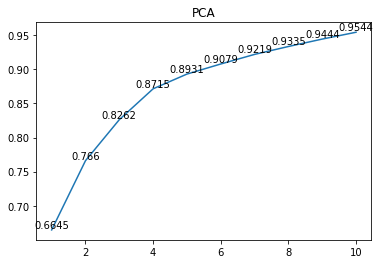

'手肘法选n_components = 6'

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle') #mle表示自动选最优
pca.fit(pca_X)

n_max = 10
x = np.arange(1,n_max +1)
y = pca.explained_variance_ratio_.cumsum()[:n_max]
plt.plot(x,y);
plt.title('PCA');
# 设置数字标签
for a, b in zip(x, y):
    plt.text(a, b, round(b,4), ha='center', va='bottom');
plt.show()
'''手肘法选n_components = 6'''

In [58]:
tar_n = 5

In [59]:
pca = PCA(n_components= tar_n)
pca.fit(pca_X)
print('PCA保留{:.2%}的信息'.format(pca.explained_variance_ratio_.sum()))
PCA_out = pd.DataFrame(pca.transform(pca_X),columns = ['PCA_' + str(i) for i in range(tar_n)],index = index.index)
PCA_out = PCA_out.merge(index.target,left_index = True,right_index = True,how = 'left')

PCA(n_components=5)

PCA保留89.31%的信息


In [60]:
PCA_out

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,target
DATETIME,,,,,,
2005-01-04,-3.547704,2.793830,-3.989531,-1.940137,0.365867,0.0
2005-01-05,-3.274525,2.403393,-3.506525,1.667669,1.215214,0.0
2005-01-06,-3.491885,2.827159,-3.725191,-0.486269,0.970314,0.0
2005-01-07,-3.288378,2.604772,-3.507540,1.696177,1.382683,0.0
2005-01-10,-3.244417,2.473050,-3.336949,2.445230,1.616724,0.0
...,...,...,...,...,...,...
2022-01-10,-3.192846,-0.069117,3.614402,1.215845,1.554558,0.0
2022-01-11,-3.446706,0.396748,3.375157,-1.566999,1.014316,0.0
2022-01-12,-3.280076,0.310278,3.512234,0.414869,1.410884,0.0


### 划分验证集

In [61]:
# std_index[selected_std_col + ['target']] # 筛选后的变量 -> LR
# PCA_out #筛选后 + PCA
# std_index #归一化，未筛选，未PCA -> XGB RF
train_test_in = std_index .copy()

In [62]:
validation_train = train_test_in.iloc[:-int(len(train_test_in)*0.3),:]
validation_test = train_test_in.iloc[-int(len(train_test_in)*0.3):,:]

'''validation_train'''
validation_train_f = validation_train.drop(['target'], axis=1)
validation_train_l = validation_train[['target']]
print(validation_train_f.columns)
print(validation_train_l.columns)

'''validation_test'''
validation_test_f = validation_test.drop(['target'], axis=1)
validation_test_l = validation_test[['target']]
print(validation_test_f.columns)
print(validation_test_l.columns)

'validation_train'

Index(['open', 'high', 'low', 'close', 'volume', 'amt', 'pct_chg', 'turn',
       'MACD_MACD', 'MACD_DIFF',
       ...
       'history_high', 'stage_low', 'up_days', 'down_days', 'breakout_ma',
       'breakdown_ma', 'history_high_days', 'history_low_days', 'bull_bear_ma',
       'bull_bear_ma.1'],
      dtype='object', length=103)
Index(['target'], dtype='object')


'validation_test'

Index(['open', 'high', 'low', 'close', 'volume', 'amt', 'pct_chg', 'turn',
       'MACD_MACD', 'MACD_DIFF',
       ...
       'history_high', 'stage_low', 'up_days', 'down_days', 'breakout_ma',
       'breakdown_ma', 'history_high_days', 'history_low_days', 'bull_bear_ma',
       'bull_bear_ma.1'],
      dtype='object', length=103)
Index(['target'], dtype='object')


In [63]:
validation_test.tail()

,open,high,low,close,volume,amt,pct_chg,turn,MACD_MACD,MACD_DIFF,...,stage_low,up_days,down_days,breakout_ma,breakdown_ma,history_high_days,history_low_days,bull_bear_ma,bull_bear_ma.1,target
DATETIME,,,,,,,,,,,,,,,,,,,,,
2022-01-10,1.234858,1.219134,1.253420,1.256795,0.073465,0.787821,0.209087,-0.450075,-0.646346,-0.196237,...,False,2,0,False,True,0,0,False,False,0.0
2022-01-11,1.250169,1.232509,1.269419,1.229499,-0.016135,0.725915,-0.422879,-0.474231,-0.670374,-0.246768,...,False,0,1,False,False,0,0,False,False,0.0
2022-01-12,1.238459,1.227909,1.270541,1.257038,0.042422,0.715908,0.374477,-0.458458,-0.549059,-0.250967,...,False,1,0,False,False,0,0,False,True,0.0
2022-01-13,1.267343,1.232401,1.234158,1.191032,0.119627,0.833432,-0.983804,-0.437612,-0.686561,-0.332490,...,False,0,1,False,False,0,0,False,True,0.0
2022-01-14,1.179881,1.139826,1.175483,1.134053,0.110877,0.732255,-0.866507,-0.439928,-0.944235,-0.462697,...,False,0,2,False,False,0,0,False,True,0.0


### SMOTE上采样

In [64]:
smote_train_x_in =  validation_train_f.copy()
smote_train_y_in = validation_train_l.copy()

In [65]:
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE,ADASYN 
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
smote_train_x_out, smote_train_y_out = smo.fit_resample(smote_train_x_in, smote_train_y_in)

In [66]:
smote_train_y_out.target.value_counts()

1.0    2572
0.0    2572
Name: target, dtype: int64

## 搭建模型

In [67]:
import pandas as pd
import numpy as np
import datetime
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,precision_score

### XGBOOST
测试集：过去1242天的数据,即30%的数据。
训练集：1 ~ 2899天数据，即70%的数据。

In [68]:
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'gamma': 0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 2,  # 构建树的深度，越大越容易过拟合
    'lambda': 2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.8,  # 随机采样训练样本
    'colsample_bytree': 0.8,  # 生成树时进行的列采样
    'min_child_weight': 18,
    'silent': 0,  # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.03,  # 如同学习率
    'eval_metric': 'auc',
}

In [69]:
params1 =  {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'gamma': 0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 3,  # 构建树的深度，越大越容易过拟合
    'lambda': 4,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':3, #权重的L1正则化项。
    'subsample': 0.5,  # 随机采样训练样本
    'colsample_bytree': 0.8,  # 生成树时进行的列采样
    'min_child_weight': 10,
    'silent': 0,  # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.03,  # 如同学习率
    'eval_metric': 'auc'
    
}

In [70]:
def XGB_train_func(params,validation_train_f,validation_train_l,validation_test_f,validation_test_l ):
    xgb_train = xgb.DMatrix(validation_train_f, label=validation_train_l)
    xgb_test = xgb.DMatrix(validation_test_f, label=validation_test_l)
    watchlist = [(xgb_train, 'train'), (xgb_test, 'val')]
    module = xgb.train(params, xgb_train, num_boost_round=200, evals=watchlist)
    result = module.predict(xgb_test)
    features = module.get_fscore()
    features = list(dict(sorted(features.items(), key=lambda d: d[1])).keys())  #[-5:]
    features.reverse()
    print(features)
    plot_importance(module)
    plt.show()
    print("auc:{0:.2%} ".format(roc_auc_score(validation_test_l.values, result)))
    return result,features


In [71]:
def judge(test_l,pre):
    '''
    输入两个series或np.array
    '''
    print('TN|FP')
    print('FN|TP')
    print(confusion_matrix(test_l,pre ))
    TN, FP, FN, TP = confusion_matrix(test_l,pre ).ravel()

    precision = TP / (TP+FP)  # 查准率
    recall = TP / (TP+FN)  # 查全率
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    print('precision:{0:.2%}, recall:{1:.2%}, accuracy:{2:.2%}'.format(precision,recall,accuracy))

[02:23:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.75858	val-auc:0.72922
[1]	train-auc:0.75931	val-auc:0.73157
[2]	train-auc:0.78065	val-auc:0.75471
[3]	train-auc:0.78066	val-auc:0.75477
[4]	train-auc:0.78170	val-auc:0.75551
[5]	train-auc:0.79109	val-auc:0.76190
[6]	train-auc:0.79400	val-auc:0.76609
[7]	train-auc:0.79301	val-auc:0.76501
[8]	train-auc:0.79285	val-auc:0.76485
[9]	train-auc:0.79398	val-auc:0.76562
[10]	train-auc:0.79435	val-auc:0.76663
[11]	train-auc:0.80780	val-auc:0.77665
[12]	train-auc:0.81195	val-auc:0.77880
[13]	train-auc:0.81905	val-auc:0.77949
[14]	train-auc:0.81957	val-auc:0.77832
[15]	train-auc:0.81987	val-auc:0.77837
[1

[198]	train-auc:0.90384	val-auc:0.78094
[199]	train-auc:0.90421	val-auc:0.78109
['KDJ_J', 'CCI', 'down_days', 'stage_low', 'vol_ratio', 'DMI.3', 'tech_downnum', 'ADTM.1', 'MTM', 'SOBV', 'MACD_MACD', 'tech_limitdownnum', 'history_high_days', 'ADTM', 'VMACD', 'val_pe_avg', 'MACD_DIFF', 'SI', 'VSTD', 'WVAD.1', 'DPO.1', 'val_pb_wgt', 'DMI_2.3', 'turn', 'ATR', 'tech_upnum', 'DMI_2.2', 'slowKD.1', 'ROC.1', 'VMACD.2', 'up_days', 'tech_downpct', 'PRICEOSC', 'bull_bear_ma', 'tech_limitdownpct', 'MIKE', 'KDJ_D', 'BIAS', 'SAR', 'DMI_2.1', 'SRMI', 'STD', 'VMACD.1', 'ATR.1', 'BBIBOLL.1', 'DMA.1', 'RSI', 'TRIX.1', 'MIKE.1', 'VOSC', 'WR', 'BOLL.2', 'DPO', 'DMI', 'low', 'VHF', 'DMI.1', 'vwap']


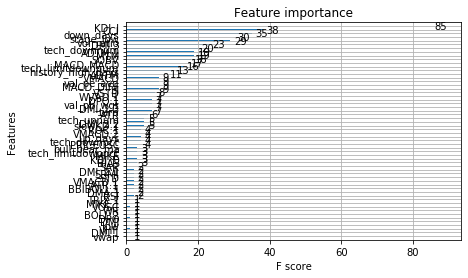

auc:78.11% 


In [72]:
XGB_test_prob,XGB_imp_f = XGB_train_func(params,smote_train_x_out,smote_train_y_out,validation_test_f,validation_test_l)

In [73]:
judge(validation_test_l,np.where(XGB_test_prob >= 0.5,1,0))

TN|FP
FN|TP
[[709 386]
 [ 35 112]]
precision:22.49%, recall:76.19%, accuracy:66.10%


### XGB调参

[02:23:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.79186	val-auc:0.75001
[1]	train-auc:0.81657	val-auc:0.76236
[2]	train-auc:0.83182	val-auc:0.76741
[3]	train-auc:0.83717	val-auc:0.76712
[4]	train-auc:0.84410	val-auc:0.76549
[5]	train-auc:0.84617	val-auc:0.76446
[6]	train-auc:0.84784	val-auc:0.76563
[7]	train-auc:0.84825	val-auc:0.76751
[8]	train-auc:0.84859	val-auc:0.76723
[9]	train-auc:0.84952	val-auc:0.77402
[10]	train-auc:0.84869	val-auc:0.77636
[11]	train-auc:0.84870	val-auc:0.77813
[12]	train-auc:0.85161	val-auc:0.78179
[13]	train-auc:0.85226	val-auc:0.78257
[14]	train-auc:0.85416	val-auc:0.78097
[15]	train-auc:0.85437	val-auc:0.78150
[1

[198]	train-auc:0.94317	val-auc:0.78355
[199]	train-auc:0.94341	val-auc:0.78382
['KDJ_J', 'down_days', 'vol_ratio', 'val_pe_avg', 'DMI.3', 'CCI', 'MTM', 'stage_low', 'ADTM.1', 'turn', 'MACD_MACD', 'tech_downnum', 'ADTM', 'SOBV', 'SI', 'up_days', 'VSTD', 'VOSC', 'DMI_2.3', 'slowKD.1', 'DMI_2.2', 'KDJ_D', 'tech_limitupnum', 'VMACD.2', 'WVAD.1', 'DMI', 'vwap', 'bull_bear_ma', 'tech_limitdownnum', 'VMACD', 'VMACD.1', 'RSI', 'WVAD', 'ATR', 'DMI.1', 'history_high_days', 'val_pb_wgt', 'BOLL.2', 'PRICEOSC', 'SRMI', 'DMI.2', 'TAPI', 'DPO.1', 'STD', 'TAPI.1', 'ROC.1', 'MTM.1', 'MACD_DIFF', 'MACD_DEA', 'WR', 'KDJ_K', 'DPO', 'tech_limituppct', 'PVT', 'MIKE', 'DMA.1', 'tech_downpct', 'TRIX', 'ROC', 'BIAS', 'VMA', 'tech_limitdownpct', 'BOLL.1', 'VHF', 'CDP.2', 'DMI_2', 'MIKE.1', 'ATR.1', 'amt', 'stage_high', 'DMA', 'tech_upnum', 'BOLL', 'swing', 'volume', 'BBIBOLL.2', 'TRIX.1', 'pct_chg', 'tech_uppct', 'high', 'SAR', 'CDP.4', 'DMI_2.1', 'ENV', 'BBIBOLL.1', 'BBI', 'bull_bear_ma.1', 'low', 'open']


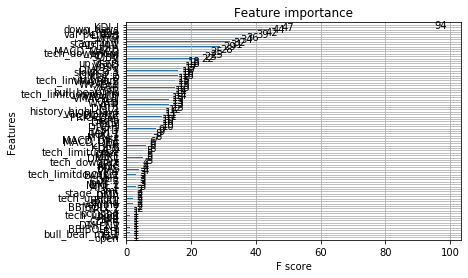

auc:78.38% 


In [74]:
XGB_test_prob1,XGB_imp_f1 = XGB_train_func(params1,smote_train_x_out,smote_train_y_out,validation_test_f,validation_test_l)

In [75]:
judge(validation_test_l,np.where(XGB_test_prob1 >= 0.5,1,0))

TN|FP
FN|TP
[[720 375]
 [ 33 114]]
precision:23.31%, recall:77.55%, accuracy:67.15%


### LR

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
def LR_train_func(train_feature,train_label,test_feature ,test_label ):
    print('开始训练logisticRegression模型:')
    LR_module = LogisticRegression(penalty='l2', solver='sag', max_iter=500, \
                                   random_state=42, n_jobs=4)  # class_weight={0:0.924,1:0.076}
    # module = lgb.LGBMClassifier(
    #     num_leaves=64,  # num_leaves = 2^max_depth * 0.6 #
    #     max_depth=6,
    #     n_estimators=80,
    #     learning_rate=0.1
    # )
    '''训练集'''
    LR_module.fit(train_feature, train_label)
    train_accurcy = LR_module.score(train_feature, train_label) * 100
    test_accurcy = LR_module.score(test_feature, test_label) * 100
    test_predict = LR_module.predict_proba(test_feature)
    print("训练集正确率为%.2s%%" % train_accurcy)
    print("测试集正确率为%.2s%%" % test_accurcy)
    return test_predict[:, 1]

In [78]:
LR_test_prob = LR_train_func(smote_train_x_out,smote_train_y_out,validation_test_f,validation_test_l)
judge(validation_test_l,np.where(LR_test_prob >= 0.5,1,0))

开始训练logisticRegression模型:


D:\set_up\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集正确率为82%
测试集正确率为71%
TN|FP
FN|TP
[[796 299]
 [ 60  87]]
precision:22.54%, recall:59.18%, accuracy:71.10%


D:\set_up\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### LR调参

In [79]:
selected_col = selected_std_col.copy() #XGB_imp_f[:20]

In [80]:
LR_test_prob = LR_train_func(smote_train_x_out,smote_train_y_out,validation_test_f,validation_test_l)
judge(validation_test_l,np.where(LR_test_prob >= 0.5,1,0))

开始训练logisticRegression模型:


D:\set_up\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集正确率为82%
测试集正确率为71%
TN|FP
FN|TP
[[796 299]
 [ 60  87]]
precision:22.54%, recall:59.18%, accuracy:71.10%


D:\set_up\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## RF

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


RF_train_x,RF_train_y = smote_train_x_out.copy(),smote_train_y_out.copy()

In [46]:
RF_module = RandomForestClassifier(oob_score=True, random_state=10)
RF_module.fit(RF_train_x,RF_train_y.values.ravel())
RF_module.oob_score_
RF_test_prob = RF_module.predict_proba(validation_test_f)[:,1]
judge(validation_test_l,np.where(RF_test_prob >= 0.5,1,0))

RandomForestClassifier(oob_score=True, random_state=10)

0.9595692807801707

TN|FP
FN|TP
[[974  73]
 [118  29]]
precision:28.43%, recall:19.73%, accuracy:84.00%


### RF调参

In [47]:
#首先对n_estimators进行网格搜索
param_test1= {'n_estimators':range(10,71,10)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                 min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),
                       param_grid =param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(RF_train_x,RF_train_y.values.ravel() )
gsearch1.cv_results_['params'],gsearch1.cv_results_['mean_test_score'],gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features='sqrt',
                                              min_samples_leaf=20,
                                              min_samples_split=100,
                                              random_state=10),
             param_grid={'n_estimators': range(10, 71, 10)}, scoring='roc_auc')

([{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70}],
 array([0.65452018, 0.66490606, 0.67342936, 0.6702679 , 0.67612835,
        0.67480769, 0.67663945]),
 {'n_estimators': 70},
 0.6766394537739471)

In [ ]:
#这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。
param_test2= {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 20,min_samples_leaf=20,max_features='sqrt' ,\
                                                          oob_score=True,random_state=10),
                           param_grid = param_test2,scoring='roc_auc', cv=5)
gsearch2.fit(RF_train_x,RF_train_y.values.ravel())
gsearch2.cv_results_['params'],gsearch2.cv_results_['mean_test_score'],gsearch2.best_params_, gsearch2.best_score_


In [ ]:
gsearch2.best_params_, gsearch2.best_score_

In [393]:
#已经取了三个最优参数，看看现在模型的袋外分数：
rf1= RandomForestClassifier(n_estimators= 20, max_depth=13, min_samples_split=50,
                                 min_samples_leaf=20,max_features='sqrt' ,oob_score=True,random_state=10)
rf1.fit(RF_train_x,RF_train_y.values.ravel())
rf1.oob_score_ #袋外分数越高，模型的泛化能力越强。

D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_depth=13, max_features='sqrt', min_samples_leaf=20,
                       min_samples_split=50, n_estimators=20, oob_score=True,
                       random_state=10)

0.8919372900335947

In [395]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参
param_test3= {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 20,max_depth=13,
                                 max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3,scoring='roc_auc', cv=5)
gsearch3.fit(RF_train_x,RF_train_y.values.ravel())
gsearch3.cv_results_['params'],gsearch3.cv_results_['mean_test_score'],gsearch3.best_params_, gsearch3.best_score_

D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably

D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably

D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, max_features='sqrt',
                                              n_estimators=20, oob_score=True,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(10, 60, 10),
                         'min_samples_split': range(80, 150, 20)},
             scoring='roc_auc')

([{'min_samples_leaf': 10, 'min_samples_split': 80},
  {'min_samples_leaf': 10, 'min_samples_split': 100},
  {'min_samples_leaf': 10, 'min_samples_split': 120},
  {'min_samples_leaf': 10, 'min_samples_split': 140},
  {'min_samples_leaf': 20, 'min_samples_split': 80},
  {'min_samples_leaf': 20, 'min_samples_split': 100},
  {'min_samples_leaf': 20, 'min_samples_split': 120},
  {'min_samples_leaf': 20, 'min_samples_split': 140},
  {'min_samples_leaf': 30, 'min_samples_split': 80},
  {'min_samples_leaf': 30, 'min_samples_split': 100},
  {'min_samples_leaf': 30, 'min_samples_split': 120},
  {'min_samples_leaf': 30, 'min_samples_split': 140},
  {'min_samples_leaf': 40, 'min_samples_split': 80},
  {'min_samples_leaf': 40, 'min_samples_split': 100},
  {'min_samples_leaf': 40, 'min_samples_split': 120},
  {'min_samples_leaf': 40, 'min_samples_split': 140},
  {'min_samples_leaf': 50, 'min_samples_split': 80},
  {'min_samples_leaf': 50, 'min_samples_split': 100},
  {'min_samples_leaf': 50, 'min_s

In [397]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 20, 'min_samples_split': 80}, 0.8461313604335)

In [399]:
#最后我们再对最大特征数max_features做调参:
param_test4= {'max_features':range(3,11,2)}
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 20,max_depth=13, min_samples_split=80,
                                 min_samples_leaf=20 ,oob_score=True, random_state=10),
   param_grid = param_test4,scoring='roc_auc', cv=5)
gsearch4.fit(RF_train_x,RF_train_y.values.ravel())
gsearch4.cv_results_['params'],gsearch4.cv_results_['mean_test_score']

D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, min_samples_leaf=20,
                                              min_samples_split=80,
                                              n_estimators=20, oob_score=True,
                                              random_state=10),
             param_grid={'max_features': range(3, 11, 2)}, scoring='roc_auc')

([{'max_features': 3},
  {'max_features': 5},
  {'max_features': 7},
  {'max_features': 9}],
 array([0.80656575, 0.83655574, 0.84115399, 0.84087633]))

In [400]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 7}, 0.8411539858334912)

In [82]:
RF_module1= RandomForestClassifier(n_estimators= 20, max_depth=13, min_samples_split=80,
                                 min_samples_leaf=20,max_features=7 ,oob_score=True, random_state=10)
RF_module1.fit(RF_train_x,RF_train_y.values.ravel())
RF_module1.oob_score_
RF_test_prob1 = RF_module1.predict_proba(validation_test_f)[:,1]
judge(validation_test_l,np.where(RF_test_prob1 >= 0.5,1,0))

D:\set_up\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_depth=13, max_features=7, min_samples_leaf=20,
                       min_samples_split=80, n_estimators=20, oob_score=True,
                       random_state=10)

0.8322317262830482

TN|FP
FN|TP
[[788 307]
 [ 46 101]]
precision:24.75%, recall:68.71%, accuracy:71.58%


## SVM

In [83]:
SVM_train_x,SVM_train_y =  smote_train_x_out.copy(),smote_train_y_out.copy()

In [84]:
from sklearn import svm
# select different type of kernel function and compare the score

print('#### kernel = rbf ####')
clf_rbf = svm.SVC(kernel='rbf',probability=True)
clf_rbf.fit(SVM_train_x,SVM_train_y.values.ravel())
SVM_test_prob = clf_rbf.predict_proba(validation_test_f)[:,-1]     # Compute probabilities of possible outcomes for samples in X.
SVM_test_pre = clf_rbf.predict(validation_test_f)                  # 模型对测试集的预测结果
print('*** prob ***')
judge(validation_test_l,np.where(SVM_test_prob >= 0.5,1,0))
print('*** pre ***')
judge(validation_test_l,SVM_test_pre)

print('#### kernel = linear ####')
clf_rbf = svm.SVC(kernel='rbf',probability=True)
clf_rbf.fit(SVM_train_x,SVM_train_y.values.ravel())
SVM_test_prob = clf_rbf.predict_proba(validation_test_f)[:,-1]     # Compute probabilities of possible outcomes for samples in X.
SVM_test_pre = clf_rbf.predict(validation_test_f)                  # 模型对测试集的预测结果
print('*** prob ***')
judge(validation_test_l,np.where(SVM_test_prob >= 0.5,1,0))
print('*** pre ***')
judge(validation_test_l,SVM_test_pre)

print('#### kernel = poly ####')
clf_rbf = svm.SVC(kernel='poly',probability=True)
clf_rbf.fit(SVM_train_x,SVM_train_y.values.ravel())
SVM_test_prob = clf_rbf.predict_proba(validation_test_f)[:,-1]     # Compute probabilities of possible outcomes for samples in X.
SVM_test_pre = clf_rbf.predict(validation_test_f)                  # 模型对测试集的预测结果
print('*** prob ***')
judge(validation_test_l,np.where(SVM_test_prob >= 0.5,1,0))
print('*** pre ***')
judge(validation_test_l,SVM_test_pre)

#### kernel = rbf ####


SVC(probability=True)

*** prob ***
TN|FP
FN|TP
[[759 336]
 [ 48  99]]
precision:22.76%, recall:67.35%, accuracy:69.08%
*** pre ***
TN|FP
FN|TP
[[679 416]
 [ 33 114]]
precision:21.51%, recall:77.55%, accuracy:63.85%
#### kernel = linear ####


SVC(probability=True)

*** prob ***
TN|FP
FN|TP
[[768 327]
 [ 50  97]]
precision:22.88%, recall:65.99%, accuracy:69.65%
*** pre ***
TN|FP
FN|TP
[[679 416]
 [ 33 114]]
precision:21.51%, recall:77.55%, accuracy:63.85%
#### kernel = poly ####


SVC(kernel='poly', probability=True)

*** prob ***
TN|FP
FN|TP
[[550 545]
 [ 23 124]]
precision:18.54%, recall:84.35%, accuracy:54.27%
*** pre ***
TN|FP
FN|TP
[[281 814]
 [  8 139]]
precision:14.59%, recall:94.56%, accuracy:33.82%


In [85]:
# 选 linear 
print('#### kernel = linear ####')
clf_rbf = svm.SVC(kernel='rbf',probability=True)
clf_rbf.fit(SVM_train_x,SVM_train_y.values.ravel())
SVM_test_prob = clf_rbf.predict_proba(validation_test_f)[:,-1]     # Compute probabilities of possible outcomes for samples in X.
SVM_test_pre = clf_rbf.predict(validation_test_f)                  # 模型对测试集的预测结果
print('*** prob ***')
judge(validation_test_l,np.where(SVM_test_prob >= 0.5,1,0))
print('*** pre ***')
judge(validation_test_l,SVM_test_pre)

#### kernel = linear ####


SVC(probability=True)

*** prob ***
TN|FP
FN|TP
[[767 328]
 [ 50  97]]
precision:22.82%, recall:65.99%, accuracy:69.57%
*** pre ***
TN|FP
FN|TP
[[679 416]
 [ 33 114]]
precision:21.51%, recall:77.55%, accuracy:63.85%


## 多模型合并

In [91]:
XGB_test_pre = np.where(XGB_test_prob1 >= 0.6,1,0)
LR_test_pre = np.where(LR_test_prob >= 0.6,1,0)
RF_test_pre = np.where(RF_test_prob1 >= 0.6,1,0)
SVM_test_pre = SVM_test_pre.copy()

print('#### avg_prob ####')
# avg_test_prob =  (XGB_test_prob1+ RF_test_prob1 )/2 
avg_test_prob = (XGB_test_prob1 + LR_test_prob + RF_test_prob1 + SVM_test_prob)/4


avg_test_pre = np.where(avg_test_prob >= 0.5,1,0)
judge(validation_test_l,avg_test_pre)
print('#### intersection_pre ####')
# mix_test_pre = XGB_test_pre + RF_test_pre   
mix_test_pre = XGB_test_pre + LR_test_pre + RF_test_pre + SVM_test_pre
print('票数:4')
judge(validation_test_l,np.where(mix_test_pre >= 4,1,0))
print('票数:3')
judge(validation_test_l,np.where(mix_test_pre >= 3,1,0))
print('票数:2')
judge(validation_test_l,np.where(mix_test_pre >= 2,1,0))
print('票数:1')
judge(validation_test_l,np.where(mix_test_pre >= 1,1,0))


#### avg_prob ####
TN|FP
FN|TP
[[771 324]
 [ 45 102]]
precision:23.94%, recall:69.39%, accuracy:70.29%
#### intersection_pre ####
票数:4
TN|FP
FN|TP
[[978 117]
 [ 99  48]]
precision:29.09%, recall:32.65%, accuracy:82.61%
票数:3
TN|FP
FN|TP
[[865 230]
 [ 68  79]]
precision:25.57%, recall:53.74%, accuracy:76.01%
票数:2
TN|FP
FN|TP
[[771 324]
 [ 44 103]]
precision:24.12%, recall:70.07%, accuracy:70.37%
票数:1
TN|FP
FN|TP
[[659 436]
 [ 26 121]]
precision:21.72%, recall:82.31%, accuracy:62.80%


In [90]:
# 最优pre结果
best_test_pre = np.where(mix_test_pre >= 4,1,0)

In [130]:
#1 V 0 
raw_data = pd.read_csv('./data/sz50_flag.csv',index_col = 0)
raw_data.DATETIME = pd.to_datetime(raw_data.DATETIME)
raw_data.set_index('DATETIME',inplace = True)
raw_data.flag = raw_data.flag.fillna(0)
test_l_pre = validation_test_l.copy()
test_l_pre['pre'] = best_test_pre

vic_data = raw_data.iloc[:,[0,-1]].merge(test_l_pre,left_index = True,right_index = True,how = 'left')
vic_data = vic_data[vic_data.index >= '2016-12-07']

# flag + shift(-1)还原
vic_data.flag = vic_data.flag.shift(1)
vic_data.target = vic_data.target.shift(1)
vic_data.pre = vic_data.pre.shift(1)

In [131]:
vic_data.to_csv('./res/20220126_1.csv')

In [132]:
def long_vis(draw_df,title_name):
    '''
    输入1000个交易日左右的数据
    输出open构成的折线 + 笔（拐点）
    '''
    draw_df = draw_df.reset_index().copy()
    ## 生成part和pen的标注点
    def part_pen_up_func(parting, open):
        if parting == 1:
            return open + 0
        else:
            return np.nan

    def part_pen_down_func(parting, open):
        if parting == -1:
            return open - 0
        else:
            return np.nan

    
    # draw_part为分型part的标记高度，part_pen为笔pen的标记高度。
    draw_df['draw_pre_up'] = draw_df.apply(lambda row: part_pen_up_func(row['pre'], row['open']), axis=1)
#     draw_df['draw_pre_down'] = draw_df.apply(lambda row: part_pen_down_func(row['pre'], row['open']), axis=1)
    draw_df['draw_true_up'] = draw_df.apply(lambda row: part_pen_up_func(row['flag'], row['open']), axis=1)
    draw_df['draw_true_down'] = draw_df.apply(lambda row: part_pen_down_func(row['flag'], row['open']), axis=1)


    
    ## 用原始高开低收数据生成k线
    draw_df['DATETIME'] = pd.to_datetime(draw_df['DATETIME'], format='%Y-%m-%d')
    
    plt.figure(figsize= (15,8));
    plt.plot(draw_df['DATETIME'] ,draw_df.open,color = 'k',alpha = 0.7)
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_pre_up,marker='o',label = 'Pre Downward inflection')
#     plt.scatter(draw_df['DATETIME'] ,draw_df.draw_pre_down,marker='*',color = 'g',label = 'Pre Upward inflection')
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_true_up,marker='^',color = 'r' ,label = 'True Downward inflection')
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_true_down,marker='^',color = 'g' ,label = 'True Upward inflection')
    plt.xticks(rotation=30)
    plt.ylabel('open')
    plt.title(title_name)
    plt.legend()
    plt.show()
    print('plot success')
#     save_path = '/pic/long_vis_'+ index_name + '.csv'
#     plt.savefig(save_path)

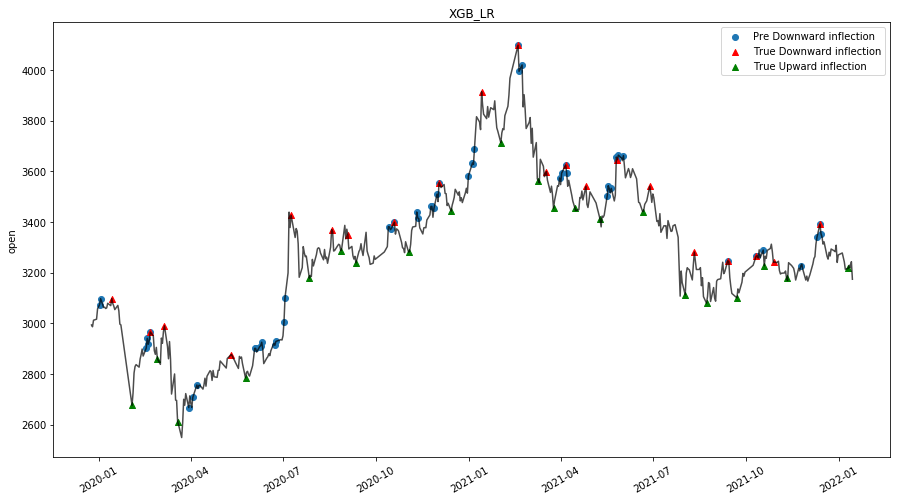

plot success


In [133]:
long_vis(vic_data.iloc[-500:,:],'XGB_LR')

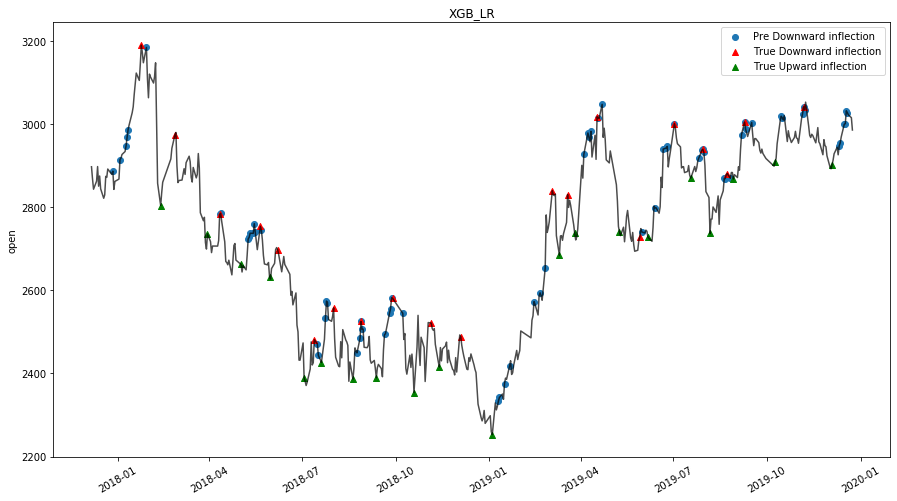

plot success


In [134]:
long_vis(vic_data.iloc[-1000:-500,:],'XGB_LR')

In [72]:
vic_data_m1 = pd.read_csv('./res/20220126_-1.csv',index_col = 0)

In [73]:
vic_data_both =  vic_data.merge(vic_data_m1['pre'],left_index = True,right_index = True)

In [114]:
def long_vis1(draw_df,title_name):
    '''
    输入1000个交易日左右的数据
    输出open构成的折线 + 笔（拐点）
    '''
    draw_df = draw_df.reset_index().copy()
    ## 生成part和pen的标注点
    def part_pen_up_func(parting, open):
        if parting == 1:
            return open + 0
        else:
            return np.nan

    def part_pen_down_func(parting, open):
        if parting == -1:
            return open - 0
        else:
            return np.nan

    
    # draw_part为分型part的标记高度，part_pen为笔pen的标记高度。
    draw_df['draw_pre_up'] = draw_df.apply(lambda row: part_pen_up_func(row['pre_x'], row['open']), axis=1)
    draw_df['draw_pre_down'] = draw_df.apply(lambda row: part_pen_up_func(row['pre_y'], row['open']), axis=1)
    draw_df['draw_true_up'] = draw_df.apply(lambda row: part_pen_up_func(row['flag'], row['open']), axis=1)
    draw_df['draw_true_down'] = draw_df.apply(lambda row: part_pen_down_func(row['flag'], row['open']), axis=1)


    
    ## 用原始高开低收数据生成k线
    draw_df['DATETIME'] = pd.to_datetime(draw_df['DATETIME'], format='%Y-%m-%d')
    
    plt.figure(figsize= (15,8));
    plt.plot(draw_df['DATETIME'] ,draw_df.open,color = 'k',alpha = 0.5)
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_pre_up,marker='x',color = 'k' ,label = 'Pre Downward inflection')
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_pre_down,marker='x',color = 'b' ,label = 'Pre Upward inflection')
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_true_up,marker='^',color = 'r' ,label = 'True Downward inflection',alpha = 0.5)
    plt.scatter(draw_df['DATETIME'] ,draw_df.draw_true_down,marker='^',color = 'g' ,label = 'True Upward inflection',alpha = 0.5)
    plt.xticks(rotation=30)
    plt.ylabel('open')
    plt.title(title_name)
    plt.legend()
    plt.show()
    print('plot success')
#     save_path = '/pic/long_vis_'+ index_name + '.csv'
#     plt.savefig(save_path)

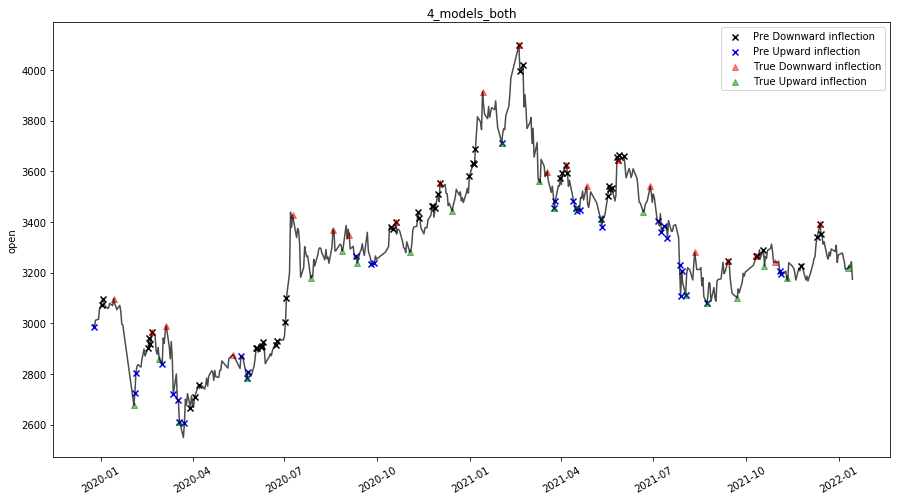

plot success


In [115]:
long_vis1(vic_data_both.iloc[-500:,:],'4_models_both')

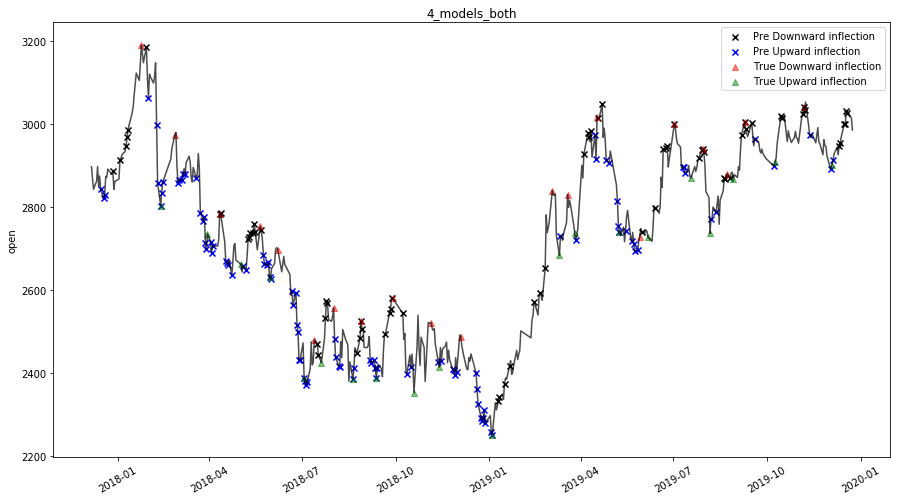

plot success


In [116]:
long_vis1(vic_data_both.iloc[-1000:-500,:],'4_models_both')